In [1]:
#let us ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#imports
import tensorflow.keras as keras

In [3]:
#Let us create a sequential model that takes a single input, x
model = keras.Sequential(
[
    keras.layers.Dense(1, input_shape = [1])
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
#let us look at the weights and bias
w, b = model.get_weights()
print("Weights:\n{}\nBias:\n{}".format(w, b))

Weights:
[[0.344689]]
Bias:
[0.]


In [7]:
#An example from Google's tutorial
#Simple linear equation: y = 3x + 1
import numpy as np
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)


In [8]:
model.compile(loss = 'mse', optimizer = 'sgd')

In [9]:
#let us obtain y from model
model.fit(xs, ys, epochs = 200, verbose = 0)

In [10]:
model.predict([11, 21, 31]) #should get 34.0, 64.0, 94.0

array([[34.041573],
       [64.0942  ],
       [94.14682 ]], dtype=float32)

In [11]:
#Let us try something more complex - y = x ** 2 + 2x + 3
ys = []
for x in xs:
    num = (x ** 2) + (2 * x) + 3
    ys.append(num)
ys = np.array(ys)
ys

array([ 2.,  3.,  6., 11., 18., 27.])

In [12]:
#Let us compile and fit the model
model.compile(loss = 'mse', optimizer = 'sgd')
#let us obtain y from model
model.fit(xs, ys, epochs = 200, verbose = 0)

In [13]:
#What does the weight look like?
print(model.get_weights())

[array([[5.0747814]], dtype=float32), array([3.4348202], dtype=float32)]


In [14]:
#let us predict some values
model.predict([4,5,6]) #should get [27, 38, 51]

array([[23.733946],
       [28.808727],
       [33.883507]], dtype=float32)

Didn't do very well, did it? Why? How do we fix the problem?

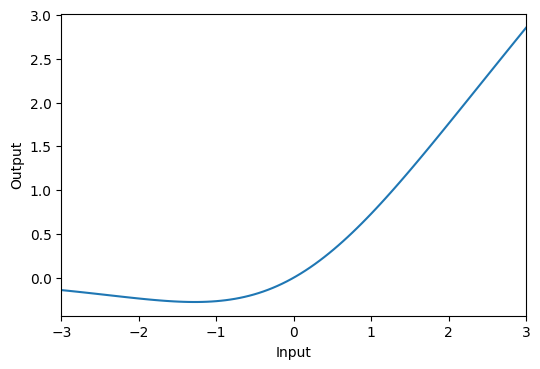

In [16]:
#Let us look at activations....
import matplotlib.pyplot as plt
import tensorflow as tf
activation_layer = keras.layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [124]:
#Let us add a hidden layer with an activation
model = keras.Sequential(
[
    keras.layers.Dense(512, activation = 'relu', input_shape = [1]), #32 hidden units or neurons
    #keras.layers.Dense(512, activation = 'swish'),
    #keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(1)
])

In [120]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [125]:
#Let us compile and fit the model
model.compile(loss = 'mse', optimizer = 'adam')
#let us fit the model
model.fit(xs, ys, epochs = 5000, verbose = 0)

In [126]:
#let us predict some values
model.predict(np.array([4,5,6])) #should get [27, 38, 51]

array([[27.      ],
       [35.25784 ],
       [43.413258]], dtype=float32)

Better than the previous model, but not good enough. Try the following:
Adding more layers
Increasing epochs
Changing the optimizer
Adding/reducing hidden units

You really need more data to train your model!! 